### Prev_application dataset exploratory data analysis (EDA) and feature engineering
Library and dataset loading, application data feature engineering function copy

In [3]:
import pandas as pd
import numpy as np
import gc
import time
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 200)


In [4]:
app_train_path = os.path.join('D:\workspace1\Kaggle_Advanced_ML\data', 'application_train.csv')
app_test_path = os.path.join('D:\workspace1\Kaggle_Advanced_ML\data', 'application_test.csv')
app_train = pd.read_csv(app_train_path)
app_test = pd.read_csv(app_test_path)

In [5]:
import os
def get_apps_dataset():
    app_train_path = os.path.join('D:\workspace1\Kaggle_Advanced_ML\data', 'application_train.csv')
    app_test_path = os.path.join('D:\workspace1\Kaggle_Advanced_ML\data', 'application_test.csv')
    app_train = pd.read_csv(app_train_path)
    app_test = pd.read_csv(app_test_path)
    apps = pd.concat([app_train, app_test])
    
    return apps

apps = get_apps_dataset()

In [6]:
def get_apps_processed(apps):
    
    # EXT_SOURCE_X FEATURE processing
    apps['APPS_EXT_SOURCE_MEAN'] = apps[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']].mean(axis=1)
    apps['APPS_EXT_SOURCE_STD'] = apps[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']].std(axis=1)
    apps['APPS_EXT_SOURCE_STD'] = apps['APPS_EXT_SOURCE_STD'].fillna(apps['APPS_EXT_SOURCE_STD'].mean())
    
    # AMT_CREDIT ratio Feature processing
    apps['APPS_ANNUITY_CREDIT_RATIO'] = apps['AMT_ANNUITY']/apps['AMT_CREDIT']
    apps['APPS_GOODS_CREDIT_RATIO'] = apps['AMT_GOODS_PRICE']/apps['AMT_CREDIT']
    
    # AMT_INCOME_TOTAL ratio Feature processing
    apps['APPS_ANNUITY_INCOME_RATIO'] = apps['AMT_ANNUITY']/apps['AMT_INCOME_TOTAL']
    apps['APPS_CREDIT_INCOME_RATIO'] = apps['AMT_CREDIT']/apps['AMT_INCOME_TOTAL']
    apps['APPS_GOODS_INCOME_RATIO'] = apps['AMT_GOODS_PRICE']/apps['AMT_INCOME_TOTAL']
    apps['APPS_CNT_FAM_INCOME_RATIO'] = apps['AMT_INCOME_TOTAL']/apps['CNT_FAM_MEMBERS']
    
    # DAYS_BIRTH, DAYS_EMPLOYED ratio processing
    apps['APPS_EMPLOYED_BIRTH_RATIO'] = apps['DAYS_EMPLOYED']/apps['DAYS_BIRTH']
    apps['APPS_INCOME_EMPLOYED_RATIO'] = apps['AMT_INCOME_TOTAL']/apps['DAYS_EMPLOYED']
    apps['APPS_INCOME_BIRTH_RATIO'] = apps['AMT_INCOME_TOTAL']/apps['DAYS_BIRTH']
    apps['APPS_CAR_BIRTH_RATIO'] = apps['OWN_CAR_AGE'] / apps['DAYS_BIRTH']
    apps['APPS_CAR_EMPLOYED_RATIO'] = apps['OWN_CAR_AGE'] / apps['DAYS_EMPLOYED']
    
    return apps

In [7]:
prev_path = os.path.join('D:\workspace1\Kaggle_Advanced_ML\data', 'previous_application.csv')
prev = pd.read_csv(prev_path)
prev.shape, apps.shape

((1670214, 37), (356255, 122))

In [6]:
prev.head(3)

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0


In [7]:
apps.head(3)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1.0,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0.0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0.0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

In [8]:
# Prev and app customer list comparision. 
# If the data coming only from left : exists only on previous app dataset
# If the data coming only from right : exists only on current app dataset (borrowing money for the first time)
# indcator = True -> _mearge column generation
prev_app_outer = prev.merge(apps['SK_ID_CURR'], on='SK_ID_CURR', how='outer', indicator=True)
prev_app_outer['_merge'].value_counts()

both          1670214
right_only      17398
left_only           0
Name: _merge, dtype: int64

previous dataset columns and NUll

In [15]:
prev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

### EDA for essential columns
Mean SK_ID_PREV for each SK_ID_Curr
boxplot

In [18]:
prev.groupby('SK_ID_CURR')['SK_ID_PREV'].count().mean()

4.928964135313716

<AxesSubplot:ylabel='SK_ID_PREV'>

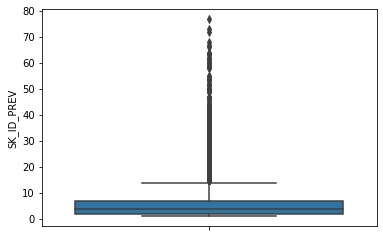

In [20]:
sns.boxplot(y = prev.groupby('SK_ID_CURR')['SK_ID_PREV'].count())

### Numerical features histogram based on target
- Prev and App data inner join to get application_train's target

In [9]:
app_prev = prev.merge(app_train[['SK_ID_CURR', 'TARGET']], on='SK_ID_CURR', how='inner')
app_prev.shape

(1413701, 38)

In [31]:
def show_hist_by_target(df, columns):
    cond_1 = df['TARGET'] == 1
    cond_0 = df['TARGET'] == 0
    
    for column in columns:
        fig, axs = plt.subplots(figsize=(12,4), nrows=1, ncols=2, squeeze=False)
        sns.violinplot(x='TARGET', y=column, data=df, ax=axs[0][0])
        sns.distplot(df[cond_0][column], ax=axs[0][1], label='0', color='blue')
        sns.distplot(df[cond_1][column], ax=axs[0][1], label='0', color='red')

In [10]:
num_columns = app_prev.dtypes[app_prev.dtypes!='object'].index.tolist()
num_columns = [column for column in num_columns if column not in ['SK_ID_PREV','SK_ID_CURR', 'TARGET']]

In [33]:
print(num_columns)

['AMT_ANNUITY', 'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE', 'HOUR_APPR_PROCESS_START', 'NFLAG_LAST_APPL_IN_DAY', 'RATE_DOWN_PAYMENT', 'RATE_INTEREST_PRIMARY', 'RATE_INTEREST_PRIVILEGED', 'DAYS_DECISION', 'SELLERPLACE_AREA', 'CNT_PAYMENT', 'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_LAST_DUE', 'DAYS_TERMINATION', 'NFLAG_INSURED_ON_APPROVAL']


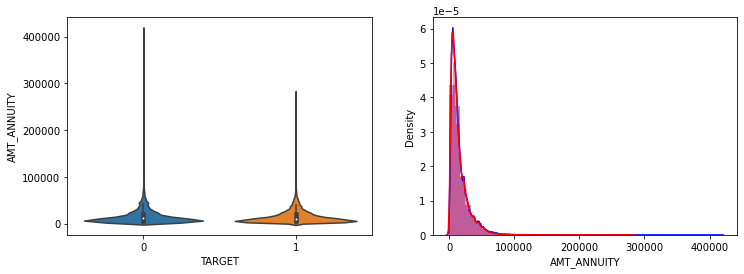

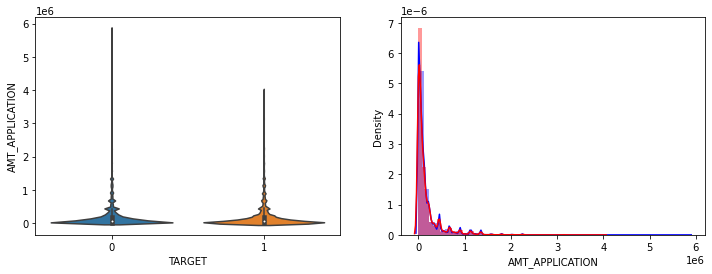

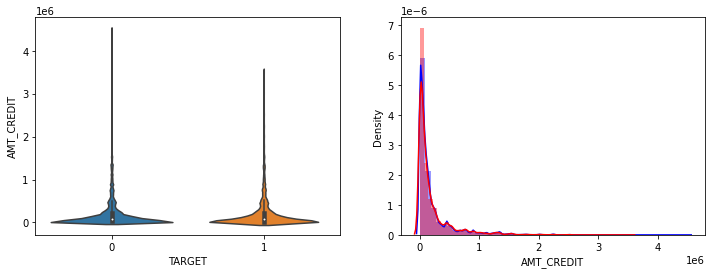

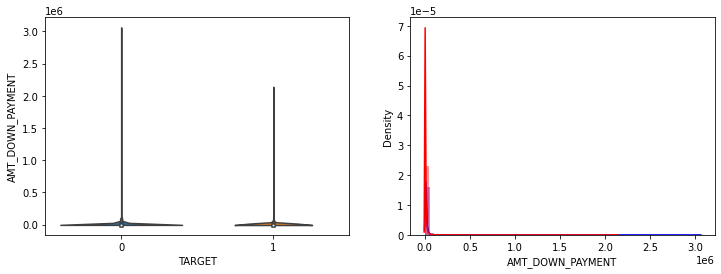

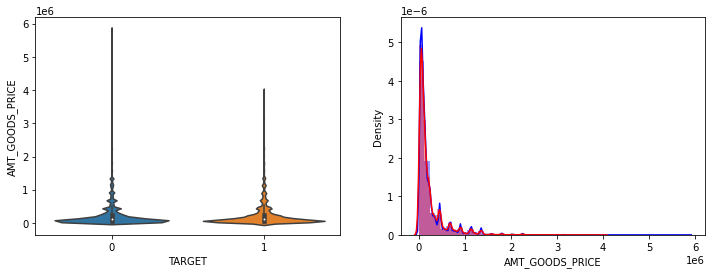

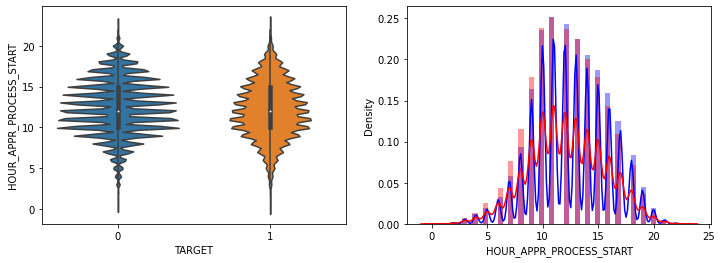

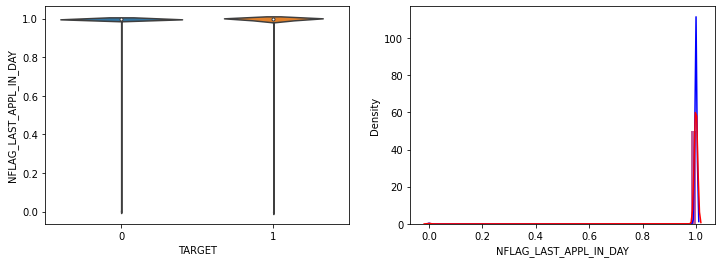

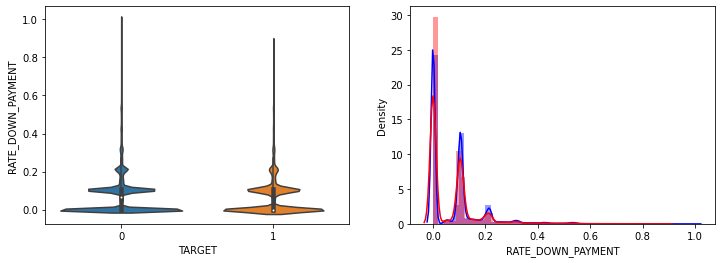

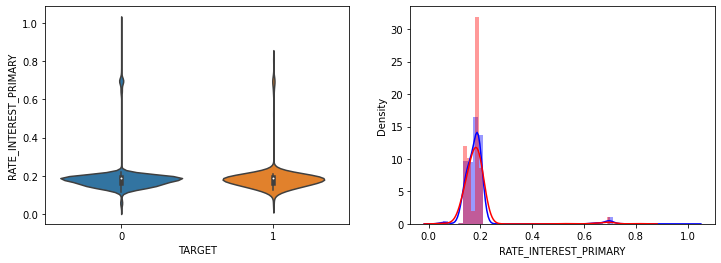

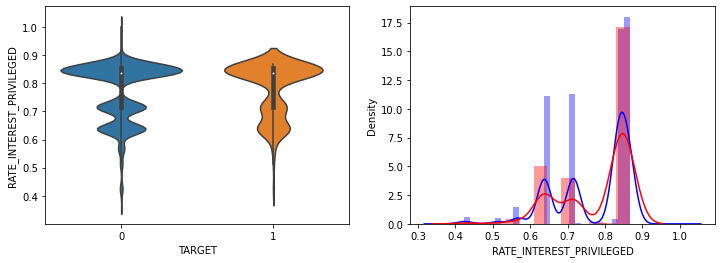

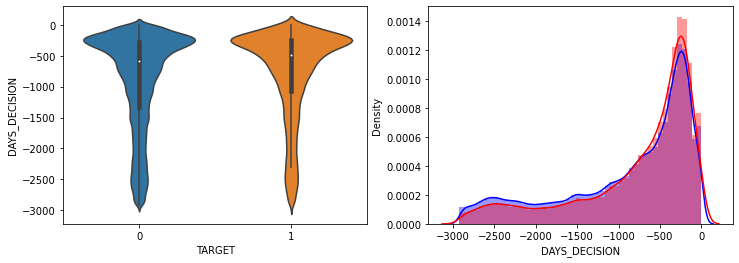

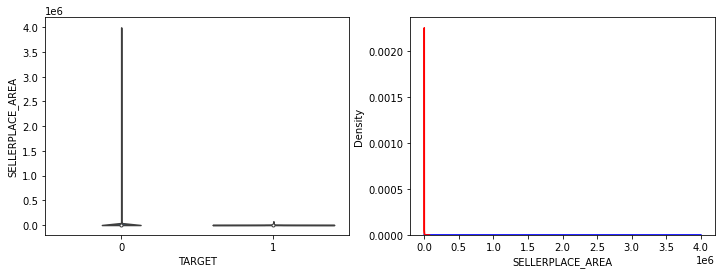

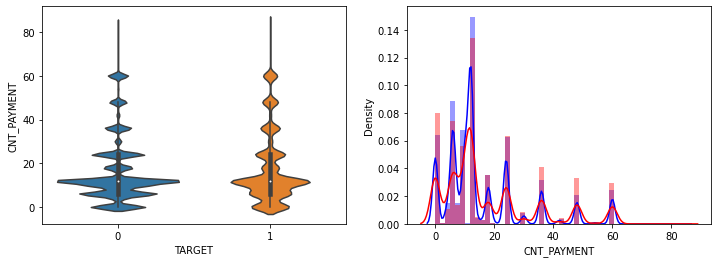

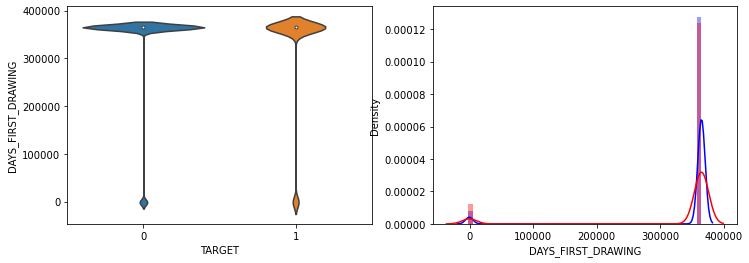

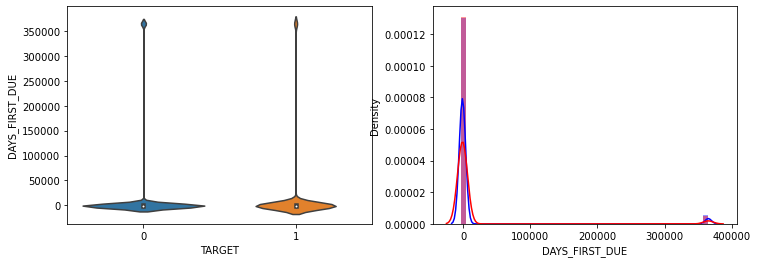

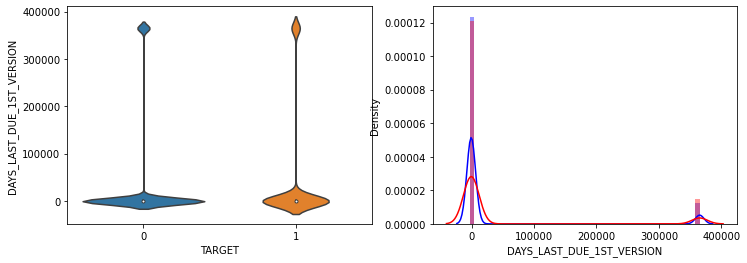

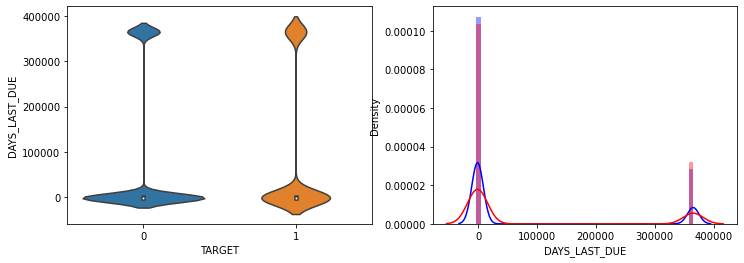

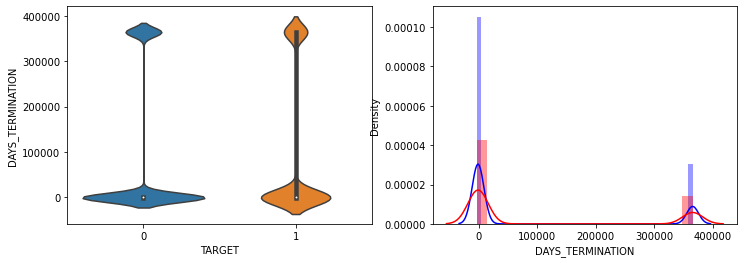

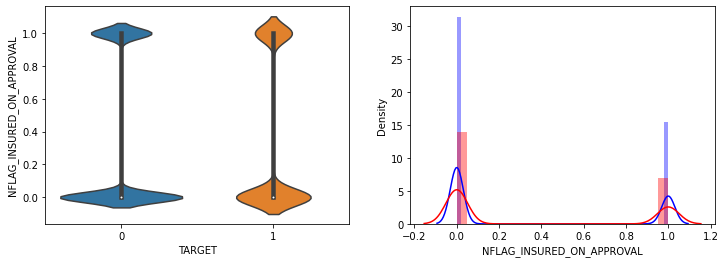

In [38]:
show_hist_by_target(app_prev, num_columns)

- AMT_ANNUITY, AMT_CREDIT, AMT_APPLICATION, AMT_GOOD_CREDIT : little more in small amount in case of TARGET=1
- RATE_DOWN_PAYMENT : no big difference
- RATE_INTEREST_PRIARY, RATE_INTEREST_PRIVILEGED : not enough samples
- DAYS_DECISION : more cases of decision within few days in case of TARGET=1
- DAYS_FIRST_DRAWING, DAYS_FIRST_DUE, DAYS_LAST_DUE_1ST_VERSION, DAYS_LAST_DUE, DAYS_TERMINATIOn : need to handle value 365243

In [11]:
object_columns = app_prev.dtypes[app_prev.dtypes == 'object'].index.tolist()
object_columns

['NAME_CONTRACT_TYPE',
 'WEEKDAY_APPR_PROCESS_START',
 'FLAG_LAST_APPL_PER_CONTRACT',
 'NAME_CASH_LOAN_PURPOSE',
 'NAME_CONTRACT_STATUS',
 'NAME_PAYMENT_TYPE',
 'CODE_REJECT_REASON',
 'NAME_TYPE_SUITE',
 'NAME_CLIENT_TYPE',
 'NAME_GOODS_CATEGORY',
 'NAME_PORTFOLIO',
 'NAME_PRODUCT_TYPE',
 'CHANNEL_TYPE',
 'NAME_SELLER_INDUSTRY',
 'NAME_YIELD_GROUP',
 'PRODUCT_COMBINATION']

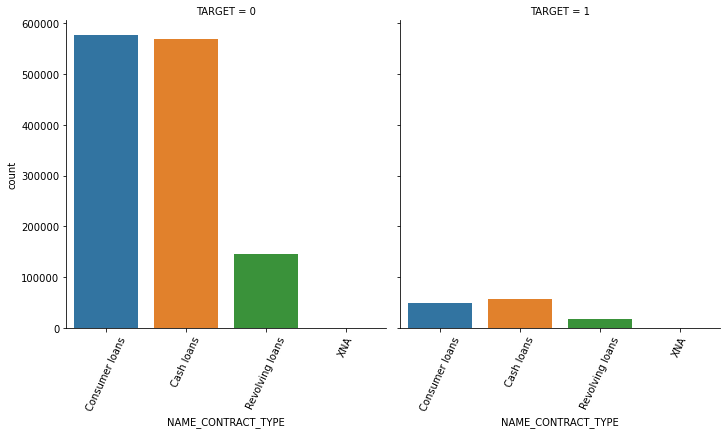

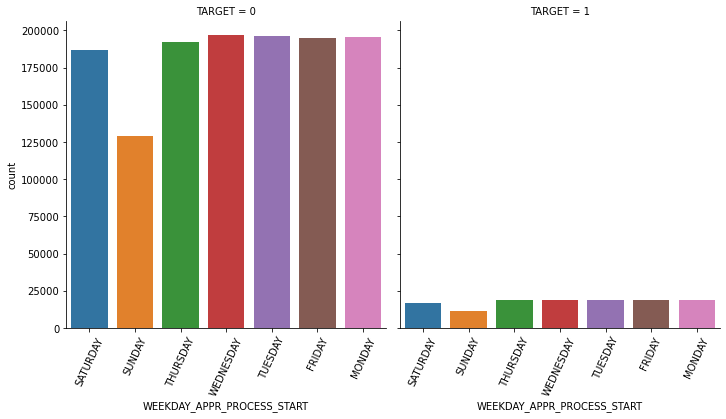

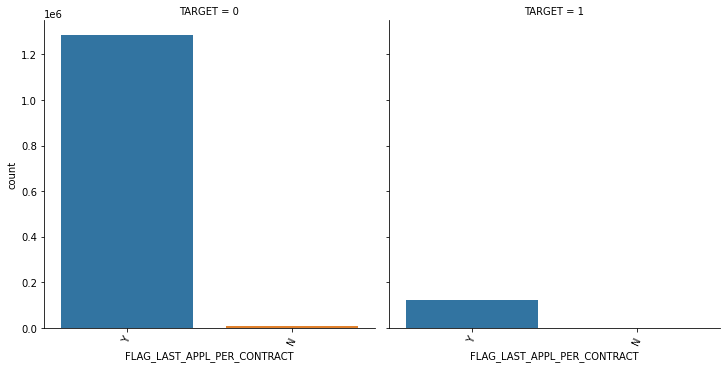

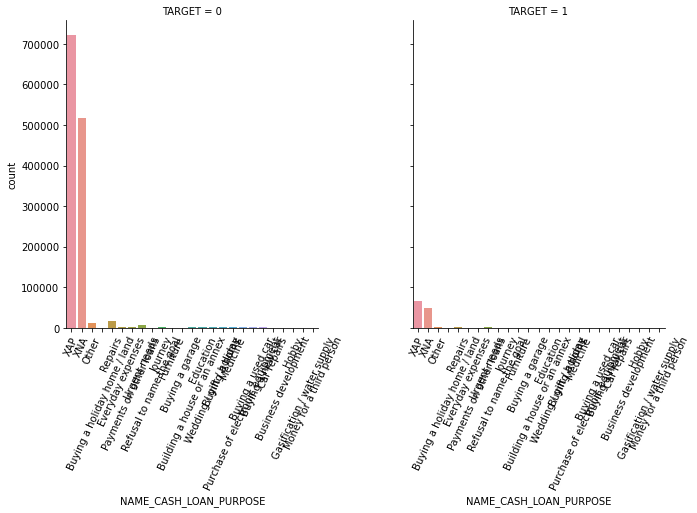

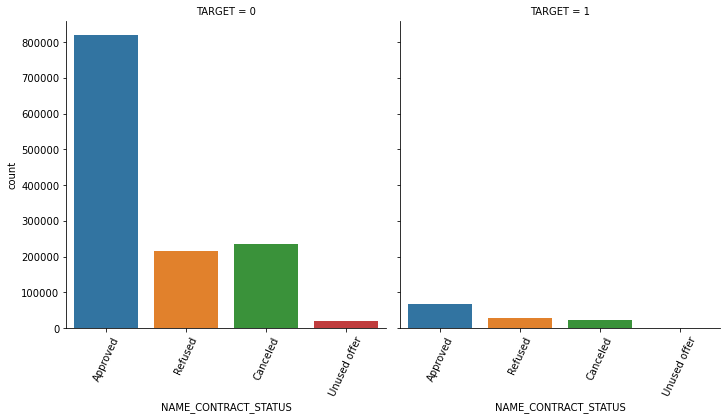

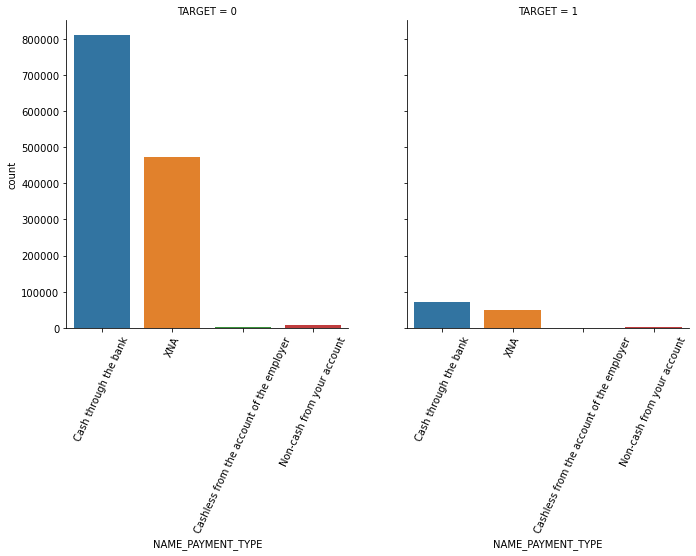

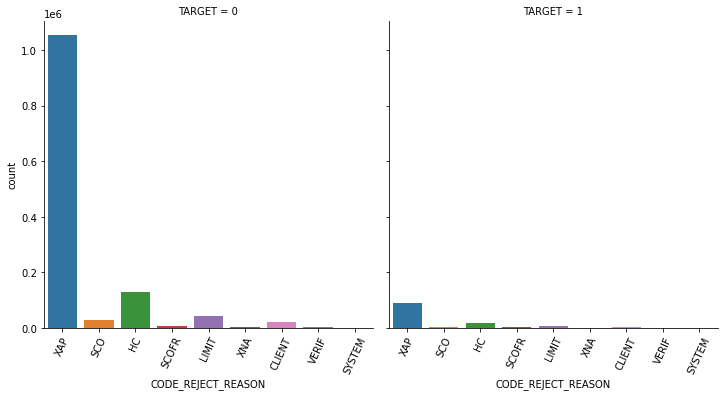

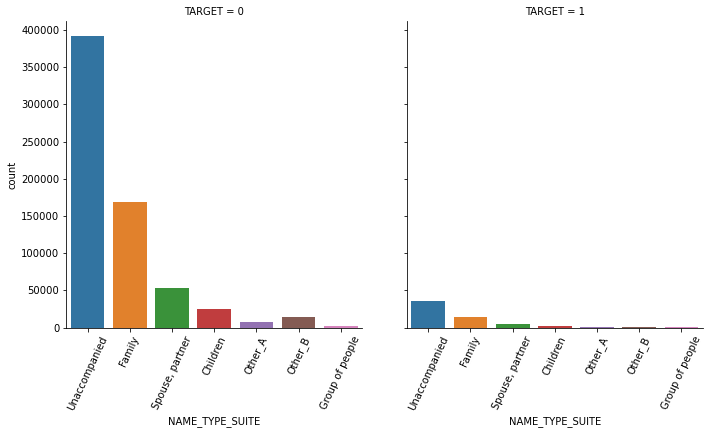

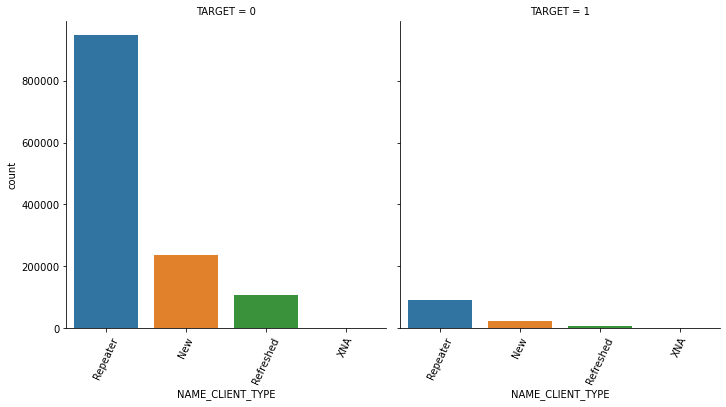

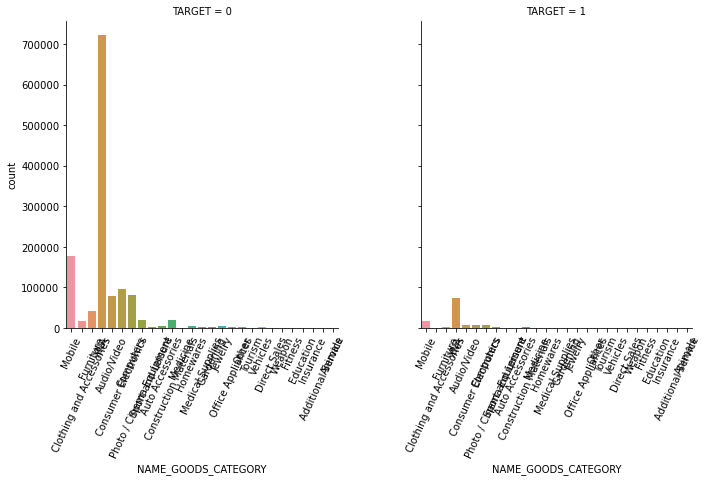

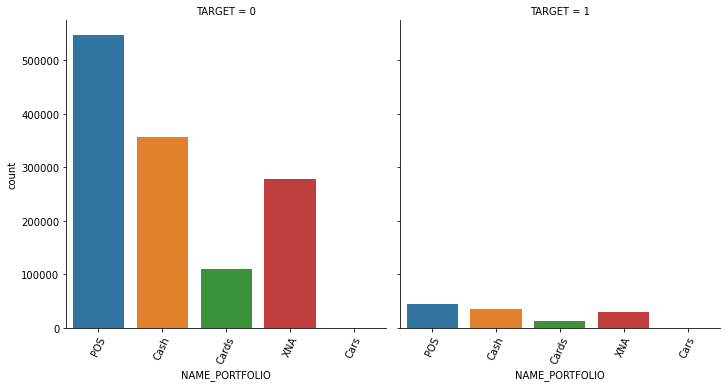

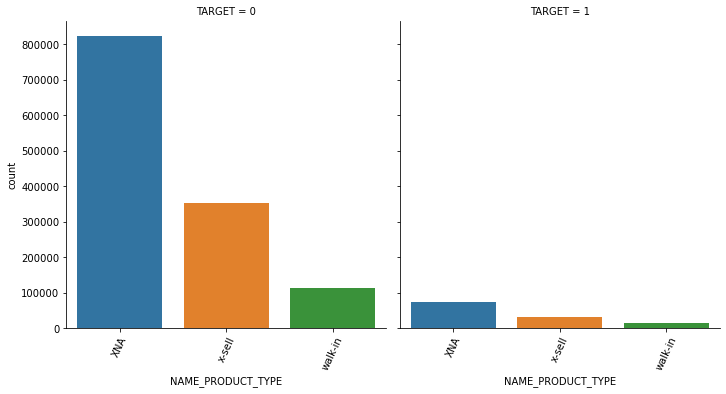

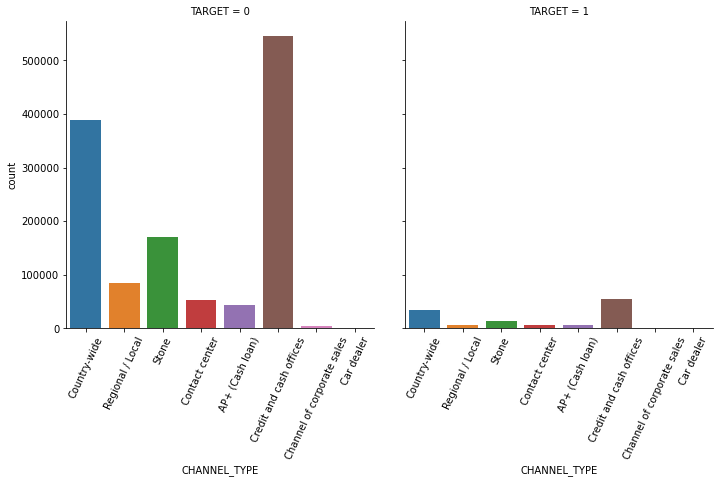

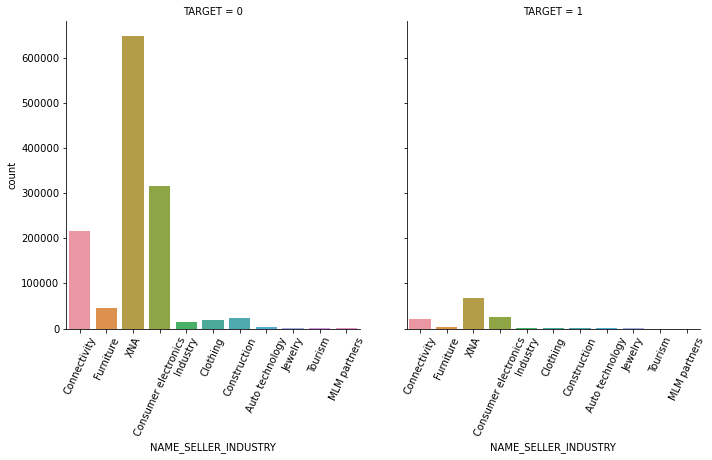

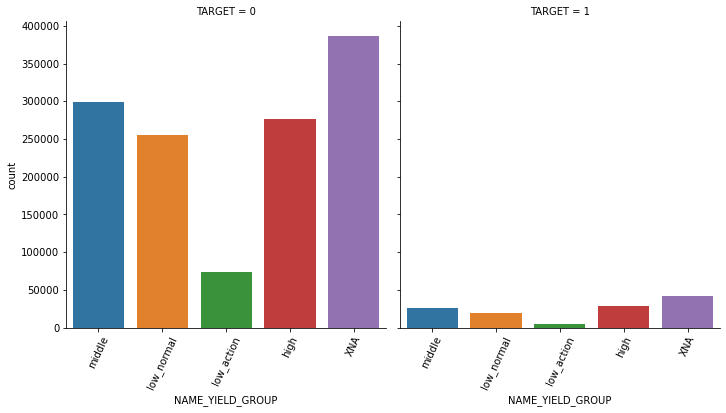

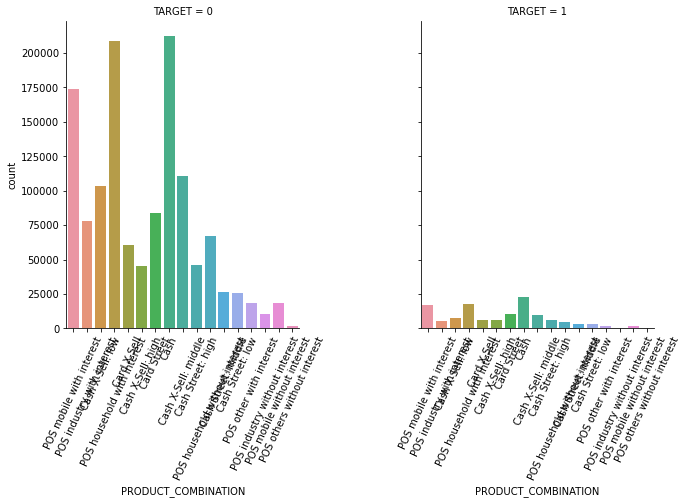

In [40]:
def show_category_by_target(df, columns):
    for column in columns:
        chart = sns.catplot(x=column, col='TARGET', data=df, kind='count')
        chart.set_xticklabels(rotation=65)

show_category_by_target(app_prev, object_columns)

- NAME_CONTRACT_TYPE : more CASH_LOAN in case of TARGET = 1
- NAME_CONTRACT_STATS : ratio of 'Refused' is higher in case of TARGET = 1
- NAME_PAYMENT_TYPE : more XNA ratio in case of TARGET = 1

### PREV Data set feature engineering

- Pandas groupby
- Comparison to SQL

In [12]:
prev.groupby('SK_ID_CURR')

In [13]:
# DataFrameGroupby generation
prev_group = prev.groupby('SK_ID_CURR')

# DataFrame for aggregation results 
prev_agg = pd.DataFrame()
prev_agg['CNT'] = prev_group['SK_ID_CURR'].count()
prev_agg['AVG_CREDIT'] = prev_group['AMT_CREDIT'].mean()
prev_agg['MAX_CREDIT'] = prev_group['AMT_CREDIT'].max()

# groupby feature becomes index of the returned dataframe
prev_agg.head(10)

,CNT,AVG_CREDIT,MAX_CREDIT
SK_ID_CURR,,,
100001,1,23787.000000,23787.0
100002,1,179055.000000,179055.0
100003,3,484191.000000,1035882.0
100004,1,20106.000000,20106.0
100005,2,20076.750000,40153.5
100006,9,291695.500000,906615.0
100007,6,166638.750000,284400.0
100008,5,162767.700000,501975.0
100009,7,70137.642857,98239.5


#### agg() and dictionary for groupby

In [14]:
agg_dict = {
    'SK_ID_CURR':'count',
    'AMT_CREDIT':['mean', 'max', 'sum'],
    'AMT_ANNUITY':['mean', 'max', 'sum'],
    'AMT_APPLICATION':['mean', 'max', 'sum'],
    'AMT_DOWN_PAYMENT':['mean', 'max', 'sum'],
    'AMT_GOODS_PRICE':['mean', 'max', 'sum']
}
prev_group = prev.groupby('SK_ID_CURR')
prev_amt_agg = prev_group.agg(agg_dict)
prev_amt_agg.head()

SK_ID_CURR AMT_CREDIT                       AMT_ANNUITY             \
                count       mean        max        sum        mean        max   
SK_ID_CURR                                                                      
100001              1   23787.00    23787.0    23787.0    3951.000   3951.000   
100002              1  179055.00   179055.0   179055.0    9251.775   9251.775   
100003              3  484191.00  1035882.0  1452573.0   56553.990  98356.995   
100004              1   20106.00    20106.0    20106.0    5357.250   5357.250   
100005              2   20076.75    40153.5    40153.5    4813.200   4813.200   

                       AMT_APPLICATION                      AMT_DOWN_PAYMENT  \
                   sum            mean       max        sum             mean   
SK_ID_CURR                                                                     
100001        3951.000        24835.50   24835.5    24835.5           2520.0   
100002        9251.775       179055.00  179055.0   179055.0              0.0   
100003      169661.970       435436.50  900000.0  1306309.5           3442.5   
100004        5357.250        24282.00   24282.0    24282.0           4860.0   
100005        4813.200        22308.75   44617.5    44617.5           4464.0   

                           AMT_GOODS_PRICE                       
               max     sum            mean       max        sum  
SK_ID_CURR                                                       
100001      2520.0  2520.0         24835.5   24835.5    24835.5  
100002         0.0     0.0        179055.0  179055.0   179055.0  
100003      6885.0  6885.0        435436.5  900000.0  1306309.5  
100004      4860.0  4860.0         24282.0   24282.0    24282.0  
100005      4464.0  4464.0         44617.5   44617.5    44617.5

#### Multi index column handling

In [15]:
prev_amt_agg.columns

MultiIndex([(      'SK_ID_CURR', 'count'),
            (      'AMT_CREDIT',  'mean'),
            (      'AMT_CREDIT',   'max'),
            (      'AMT_CREDIT',   'sum'),
            (     'AMT_ANNUITY',  'mean'),
            (     'AMT_ANNUITY',   'max'),
            (     'AMT_ANNUITY',   'sum'),
            ( 'AMT_APPLICATION',  'mean'),
            ( 'AMT_APPLICATION',   'max'),
            ( 'AMT_APPLICATION',   'sum'),
            ('AMT_DOWN_PAYMENT',  'mean'),
            ('AMT_DOWN_PAYMENT',   'max'),
            ('AMT_DOWN_PAYMENT',   'sum'),
            ( 'AMT_GOODS_PRICE',  'mean'),
            ( 'AMT_GOODS_PRICE',   'max'),
            ( 'AMT_GOODS_PRICE',   'sum')],
           )

In [16]:
prev_amt_agg.columns.ravel()

array([('SK_ID_CURR', 'count'), ('AMT_CREDIT', 'mean'),
       ('AMT_CREDIT', 'max'), ('AMT_CREDIT', 'sum'),
       ('AMT_ANNUITY', 'mean'), ('AMT_ANNUITY', 'max'),
       ('AMT_ANNUITY', 'sum'), ('AMT_APPLICATION', 'mean'),
       ('AMT_APPLICATION', 'max'), ('AMT_APPLICATION', 'sum'),
       ('AMT_DOWN_PAYMENT', 'mean'), ('AMT_DOWN_PAYMENT', 'max'),
       ('AMT_DOWN_PAYMENT', 'sum'), ('AMT_GOODS_PRICE', 'mean'),
       ('AMT_GOODS_PRICE', 'max'), ('AMT_GOODS_PRICE', 'sum')],
      dtype=object)

In [17]:
['PREV_'+'_'.join(x).upper() for x in prev_amt_agg.columns]

['PREV_SK_ID_CURR_COUNT',
 'PREV_AMT_CREDIT_MEAN',
 'PREV_AMT_CREDIT_MAX',
 'PREV_AMT_CREDIT_SUM',
 'PREV_AMT_ANNUITY_MEAN',
 'PREV_AMT_ANNUITY_MAX',
 'PREV_AMT_ANNUITY_SUM',
 'PREV_AMT_APPLICATION_MEAN',
 'PREV_AMT_APPLICATION_MAX',
 'PREV_AMT_APPLICATION_SUM',
 'PREV_AMT_DOWN_PAYMENT_MEAN',
 'PREV_AMT_DOWN_PAYMENT_MAX',
 'PREV_AMT_DOWN_PAYMENT_SUM',
 'PREV_AMT_GOODS_PRICE_MEAN',
 'PREV_AMT_GOODS_PRICE_MAX',
 'PREV_AMT_GOODS_PRICE_SUM']

In [18]:
prev_amt_agg.columns = ['PREV_'+'_'.join(x).upper() for x in prev_amt_agg.columns]

In [19]:
prev_amt_agg.head(3)

,PREV_SK_ID_CURR_COUNT,PREV_AMT_CREDIT_MEAN,PREV_AMT_CREDIT_MAX,PREV_AMT_CREDIT_SUM,PREV_AMT_ANNUITY_MEAN,PREV_AMT_ANNUITY_MAX,PREV_AMT_ANNUITY_SUM,PREV_AMT_APPLICATION_MEAN,PREV_AMT_APPLICATION_MAX,PREV_AMT_APPLICATION_SUM,PREV_AMT_DOWN_PAYMENT_MEAN,PREV_AMT_DOWN_PAYMENT_MAX,PREV_AMT_DOWN_PAYMENT_SUM,PREV_AMT_GOODS_PRICE_MEAN,PREV_AMT_GOODS_PRICE_MAX,PREV_AMT_GOODS_PRICE_SUM
SK_ID_CURR,,,,,,,,,,,,,,,,
100001,1,23787.0,23787.0,23787.0,3951.000,3951.000,3951.000,24835.5,24835.5,24835.5,2520.0,2520.0,2520.0,24835.5,24835.5,24835.5
100002,1,179055.0,179055.0,179055.0,9251.775,9251.775,9251.775,179055.0,179055.0,179055.0,0.0,0.0,0.0,179055.0,179055.0,179055.0
100003,3,484191.0,1035882.0,1452573.0,56553.990,98356.995,169661.970,435436.5,900000.0,1306309.5,3442.5,6885.0,6885.0,435436.5,900000.0,1306309.5


#### prev feature processing, based on AMT_APPLICATION value

In [20]:
prev['PREV_CREDIT_DIFF'] = prev['AMT_APPLICATION']-prev['AMT_CREDIT']
prev['PREV_GOODS_DIFF'] = prev['AMT_APPLICATION']-prev['AMT_GOODS_PRICE']

prev['PREV_CREDIT_APPL_RATIO'] = prev['AMT_CREDIT']/prev['AMT_APPLICATION']
prev['PREV_ANNUITY_APPL_RATIO'] = prev['AMT_ANNUITY']/prev['AMT_APPLICATION']
prev['PREV_GOODS_APPL_RATIO'] = prev['AMT_GOODS_PRICE']/prev['AMT_APPLICATION']

#### DAYS_XXXX feature, First due and last due feature's outlier handling

In [21]:
prev['DAYS_FIRST_DRAWING'].replace(365243, np.nan, inplace=True)
prev['DAYS_FIRST_DUE'].replace(365243, np.nan, inplace=True)
prev['DAYS_LAST_DUE_1ST_VERSION'].replace(365243, np.nan, inplace=True)
prev['DAYS_LAST_DUE'].replace(365243, np.nan, inplace=True)
prev['DAYS_TERMINATION'].replace(365243, np.nan, inplace=True)

prev['PREV_DAYS_LAST_DUE_DIFF'] = prev['DAYS_LAST_DUE_1ST_VERSION']-prev['DAYS_LAST_DUE']

#### Newly generate interest rate depending on the 'AMT_ANNUITY', 'CNT_PAYMENT', and 'AMT_CREDIT'

In [22]:
all_pay = prev['AMT_ANNUITY'] * prev['CNT_PAYMENT']
prev['PREV_INTERESTS_RATE'] = (all_pay/prev['AMT_CREDIT']-1)/prev['CNT_PAYMENT']

In [23]:
prev.iloc[:,-7:].head(10)

,PREV_CREDIT_DIFF,PREV_GOODS_DIFF,PREV_CREDIT_APPL_RATIO,PREV_ANNUITY_APPL_RATIO,PREV_GOODS_APPL_RATIO,PREV_DAYS_LAST_DUE_DIFF,PREV_INTERESTS_RATE
0,0.0,0.0,1.000000,0.100929,1.0,342.0,0.017596
1,-72171.0,0.0,1.118800,0.041463,1.0,NaN,0.009282
2,-23944.5,0.0,1.212840,0.133873,1.0,NaN,0.027047
3,-20790.0,0.0,1.046200,0.104536,1.0,30.0,0.016587
4,-66555.0,0.0,1.197200,0.094591,1.0,NaN,0.037343
5,-25573.5,0.0,1.081186,0.075251,1.0,0.0,0.014044
6,0.0,NaN,NaN,NaN,NaN,NaN,NaN
7,0.0,NaN,NaN,NaN,NaN,NaN,NaN
8,0.0,NaN,NaN,NaN,NaN,NaN,NaN
9,0.0,NaN,NaN,NaN,NaN,NaN,NaN


#### aggregating original feautres and newly generated feautres

In [24]:
agg_dict = {
    # original features
    'SK_ID_CURR':'count',
    'AMT_CREDIT':['mean', 'max', 'sum'],
    'AMT_ANNUITY':['mean', 'max', 'sum'],
    'AMT_APPLICATION':['mean', 'max', 'sum'],
    'AMT_DOWN_PAYMENT':['mean', 'max', 'sum'],
    'AMT_GOODS_PRICE':['mean', 'max', 'sum'],
    'RATE_DOWN_PAYMENT':['min', 'max', 'mean'],
    'DAYS_DECISION':['min', 'max', 'mean'],
    'CNT_PAYMENT':['mean', 'sum'],
    # newly generated features
    'PREV_CREDIT_DIFF':['mean', 'max', 'sum'], 
    'PREV_CREDIT_APPL_RATIO':['mean', 'max'],
    'PREV_GOODS_DIFF':['mean', 'max', 'sum'],
    'PREV_GOODS_APPL_RATIO':['mean', 'max'],
    'PREV_DAYS_LAST_DUE_DIFF':['mean', 'max', 'sum'],
    'PREV_INTERESTS_RATE':['mean', 'max']
    
}

prev_group = prev.groupby('SK_ID_CURR')
prev_amt_agg = prev_group.agg(agg_dict)
prev_amt_agg.columns = ['PREV_'+'_'.join(x).upper() for x in prev_amt_agg.columns]

In [25]:
prev_amt_agg.head()

,PREV_SK_ID_CURR_COUNT,PREV_AMT_CREDIT_MEAN,PREV_AMT_CREDIT_MAX,PREV_AMT_CREDIT_SUM,PREV_AMT_ANNUITY_MEAN,PREV_AMT_ANNUITY_MAX,PREV_AMT_ANNUITY_SUM,PREV_AMT_APPLICATION_MEAN,PREV_AMT_APPLICATION_MAX,PREV_AMT_APPLICATION_SUM,PREV_AMT_DOWN_PAYMENT_MEAN,PREV_AMT_DOWN_PAYMENT_MAX,PREV_AMT_DOWN_PAYMENT_SUM,PREV_AMT_GOODS_PRICE_MEAN,PREV_AMT_GOODS_PRICE_MAX,PREV_AMT_GOODS_PRICE_SUM,PREV_RATE_DOWN_PAYMENT_MIN,PREV_RATE_DOWN_PAYMENT_MAX,PREV_RATE_DOWN_PAYMENT_MEAN,PREV_DAYS_DECISION_MIN,PREV_DAYS_DECISION_MAX,PREV_DAYS_DECISION_MEAN,PREV_CNT_PAYMENT_MEAN,PREV_CNT_PAYMENT_SUM,PREV_PREV_CREDIT_DIFF_MEAN,PREV_PREV_CREDIT_DIFF_MAX,PREV_PREV_CREDIT_DIFF_SUM,PREV_PREV_CREDIT_APPL_RATIO_MEAN,PREV_PREV_CREDIT_APPL_RATIO_MAX,PREV_PREV_GOODS_DIFF_MEAN,PREV_PREV_GOODS_DIFF_MAX,PREV_PREV_GOODS_DIFF_SUM,PREV_PREV_GOODS_APPL_RATIO_MEAN,PREV_PREV_GOODS_APPL_RATIO_MAX,PREV_PREV_DAYS_LAST_DUE_DIFF_MEAN,PREV_PREV_DAYS_LAST_DUE_DIFF_MAX,PREV_PREV_DAYS_LAST_DUE_DIFF_SUM,PREV_PREV_INTERESTS_RATE_MEAN,PREV_PREV_INTERESTS_RATE_MAX
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
100001,1,23787.00,23787.0,23787.0,3951.000,3951.000,3951.000,24835.50,24835.5,24835.5,2520.0,2520.0,2520.0,24835.5,24835.5,24835.5,0.104326,0.104326,0.104326,-1740,-1740,-1740.0,8.0,8.0,1048.5,1048.5,1048.5,0.957782,0.957782,0.0,0.0,0.0,1.0,1.0,120.0,120.0,120.0,0.041099,0.041099
100002,1,179055.00,179055.0,179055.0,9251.775,9251.775,9251.775,179055.00,179055.0,179055.0,0.0,0.0,0.0,179055.0,179055.0,179055.0,0.000000,0.000000,0.000000,-606,-606,-606.0,24.0,24.0,0.0,0.0,0.0,1.000000,1.000000,0.0,0.0,0.0,1.0,1.0,150.0,150.0,150.0,0.010003,0.010003
100003,3,484191.00,1035882.0,1452573.0,56553.990,98356.995,169661.970,435436.50,900000.0,1306309.5,3442.5,6885.0,6885.0,435436.5,900000.0,1306309.5,0.000000,0.100061,0.050030,-2341,-746,-1305.0,10.0,30.0,-48754.5,756.0,-146263.5,1.057664,1.150980,0.0,0.0,0.0,1.0,1.0,50.0,150.0,150.0,0.015272,0.018533
100004,1,20106.00,20106.0,20106.0,5357.250,5357.250,5357.250,24282.00,24282.0,24282.0,4860.0,4860.0,4860.0,24282.0,24282.0,24282.0,0.212008,0.212008,0.212008,-815,-815,-815.0,4.0,4.0,4176.0,4176.0,4176.0,0.828021,0.828021,0.0,0.0,0.0,1.0,1.0,30.0,30.0,30.0,0.016450,0.016450
100005,2,20076.75,40153.5,40153.5,4813.200,4813.200,4813.200,22308.75,44617.5,44617.5,4464.0,4464.0,4464.0,44617.5,44617.5,44617.5,0.108964,0.108964,0.108964,-757,-315,-536.0,12.0,12.0,2232.0,4464.0,4464.0,0.899950,0.899950,0.0,0.0,0.0,1.0,1.0,90.0,90.0,90.0,0.036537,0.036537


#### Number of cases when NAME_CONTRACT_STATUS is Refused, and its ratio to total number of loan

In [26]:
prev['NAME_CONTRACT_STATUS'].value_counts()

Approved        1036781
Canceled         316319
Refused          290678
Unused offer      26436
Name: NAME_CONTRACT_STATUS, dtype: int64

#### SQL Group by Case when and pandas

In [27]:
'''select sk_id_curr, cnt_refused/cnt
from
(
    select sk_id_curr, count(*) cnt, count(case when name_contract_status=='Refused'end) cnt_refused
    from previous group by sk_id_curr
)
'''

"select sk_id_curr, cnt_refused/cnt\nfrom\n(\n    select sk_id_curr, count(*) cnt, count(case when name_contract_status=='Refused'end) cnt_refused\n    from previous group by sk_id_curr\n)\n"

* filtering with the condition of NAME_CONTRACT_STATUS == 'Refused', and apply groupby
* prev_amt_agg.merge(refused_df, on='SK_ID_CURR', how='left')
* reset_index()

In [28]:
# Filtering using condition of prev['NAME_CONTACT_STATUS']=='Refused'
cond_refused = prev['NAME_CONTRACT_STATUS']=='Refused'
prev_refused = prev[cond_refused]
prev_refused.shape, prev.shape

((290678, 44), (1670214, 44))

In [29]:
prev_refused_agg = prev_refused.groupby('SK_ID_CURR')['SK_ID_CURR'].count()
print(prev_amt_agg.shape, prev_refused_agg.shape)
prev_refused_agg.head(10)

(338857, 39) (118277,)


SK_ID_CURR
100006     1
100011     1
100027     1
100030    10
100035     8
100036     3
100037     2
100043     5
100046     1
100047     2
Name: SK_ID_CURR, dtype: int64

In [30]:
# Merge with dataframe and series : series is converted to dataframe and error because of ambiguity of index and column name
prev_amt_refused_agg = prev_amt_agg.merge(prev_refused_agg, on='SK_ID_CURR', how='left')

ValueError: 'SK_ID_CURR' is both an index level and a column label, which is ambiguous.

In [31]:
pd.DataFrame(prev_refused_agg)

,SK_ID_CURR
SK_ID_CURR,
100006,1
100011,1
100027,1
100030,10
100035,8
...,...
456244,1
456247,1
456249,1


In [33]:
prev_refused_agg.reset_index(name='PREV_REFUSED_COUNT')

,SK_ID_CURR,PREV_REFUSED_COUNT
0,100006,1
1,100011,1
2,100027,1
3,100030,10
4,100035,8
...,...,...
118272,456244,1
118273,456247,1
118274,456249,1
118275,456250,1


In [35]:
# In order to prevent this kind of error, groupby key is better to be normal column name, not index name

prev_refused_agg = prev_refused_agg.reset_index(name='PREV_REFUSED_COUNT')
prev_amt_agg = prev_amt_agg.reset_index()

prev_amt_refused_agg = prev_amt_agg.merge(prev_refused_agg, on = 'SK_ID_CURR', how = 'left')
prev_amt_refused_agg.head()

,SK_ID_CURR,PREV_SK_ID_CURR_COUNT,PREV_AMT_CREDIT_MEAN,PREV_AMT_CREDIT_MAX,PREV_AMT_CREDIT_SUM,PREV_AMT_ANNUITY_MEAN,PREV_AMT_ANNUITY_MAX,PREV_AMT_ANNUITY_SUM,PREV_AMT_APPLICATION_MEAN,PREV_AMT_APPLICATION_MAX,PREV_AMT_APPLICATION_SUM,PREV_AMT_DOWN_PAYMENT_MEAN,PREV_AMT_DOWN_PAYMENT_MAX,PREV_AMT_DOWN_PAYMENT_SUM,PREV_AMT_GOODS_PRICE_MEAN,PREV_AMT_GOODS_PRICE_MAX,PREV_AMT_GOODS_PRICE_SUM,PREV_RATE_DOWN_PAYMENT_MIN,PREV_RATE_DOWN_PAYMENT_MAX,PREV_RATE_DOWN_PAYMENT_MEAN,PREV_DAYS_DECISION_MIN,PREV_DAYS_DECISION_MAX,PREV_DAYS_DECISION_MEAN,PREV_CNT_PAYMENT_MEAN,PREV_CNT_PAYMENT_SUM,PREV_PREV_CREDIT_DIFF_MEAN,PREV_PREV_CREDIT_DIFF_MAX,PREV_PREV_CREDIT_DIFF_SUM,PREV_PREV_CREDIT_APPL_RATIO_MEAN,PREV_PREV_CREDIT_APPL_RATIO_MAX,PREV_PREV_GOODS_DIFF_MEAN,PREV_PREV_GOODS_DIFF_MAX,PREV_PREV_GOODS_DIFF_SUM,PREV_PREV_GOODS_APPL_RATIO_MEAN,PREV_PREV_GOODS_APPL_RATIO_MAX,PREV_PREV_DAYS_LAST_DUE_DIFF_MEAN,PREV_PREV_DAYS_LAST_DUE_DIFF_MAX,PREV_PREV_DAYS_LAST_DUE_DIFF_SUM,PREV_PREV_INTERESTS_RATE_MEAN,PREV_PREV_INTERESTS_RATE_MAX,PREV_REFUSED_COUNT
0,100001,1,23787.00,23787.0,23787.0,3951.000,3951.000,3951.000,24835.50,24835.5,24835.5,2520.0,2520.0,2520.0,24835.5,24835.5,24835.5,0.104326,0.104326,0.104326,-1740,-1740,-1740.0,8.0,8.0,1048.5,1048.5,1048.5,0.957782,0.957782,0.0,0.0,0.0,1.0,1.0,120.0,120.0,120.0,0.041099,0.041099,NaN
1,100002,1,179055.00,179055.0,179055.0,9251.775,9251.775,9251.775,179055.00,179055.0,179055.0,0.0,0.0,0.0,179055.0,179055.0,179055.0,0.000000,0.000000,0.000000,-606,-606,-606.0,24.0,24.0,0.0,0.0,0.0,1.000000,1.000000,0.0,0.0,0.0,1.0,1.0,150.0,150.0,150.0,0.010003,0.010003,NaN
2,100003,3,484191.00,1035882.0,1452573.0,56553.990,98356.995,169661.970,435436.50,900000.0,1306309.5,3442.5,6885.0,6885.0,435436.5,900000.0,1306309.5,0.000000,0.100061,0.050030,-2341,-746,-1305.0,10.0,30.0,-48754.5,756.0,-146263.5,1.057664,1.150980,0.0,0.0,0.0,1.0,1.0,50.0,150.0,150.0,0.015272,0.018533,NaN
3,100004,1,20106.00,20106.0,20106.0,5357.250,5357.250,5357.250,24282.00,24282.0,24282.0,4860.0,4860.0,4860.0,24282.0,24282.0,24282.0,0.212008,0.212008,0.212008,-815,-815,-815.0,4.0,4.0,4176.0,4176.0,4176.0,0.828021,0.828021,0.0,0.0,0.0,1.0,1.0,30.0,30.0,30.0,0.016450,0.016450,NaN
4,100005,2,20076.75,40153.5,40153.5,4813.200,4813.200,4813.200,22308.75,44617.5,44617.5,4464.0,4464.0,4464.0,44617.5,44617.5,44617.5,0.108964,0.108964,0.108964,-757,-315,-536.0,12.0,12.0,2232.0,4464.0,4464.0,0.899950,0.899950,0.0,0.0,0.0,1.0,1.0,90.0,90.0,90.0,0.036537,0.036537,NaN


In [37]:
### PREV_REFUSED_COUNT's NULL ->0, and calculate PREV_REFUSED_COUNT/PREV_SK_ID_CURR_COUNT 
prev_amt_refused_agg['PREV_REFUSED_COUNT']=prev_amt_refused_agg['PREV_REFUSED_COUNT'].fillna(0)
prev_amt_refused_agg['PREV_REFUSED_RATIO']=prev_amt_refused_agg['PREV_REFUSED_COUNT']/prev_amt_refused_agg['PREV_SK_ID_CURR_COUNT']

In [38]:
prev_amt_refused_agg.head(30)

,SK_ID_CURR,PREV_SK_ID_CURR_COUNT,PREV_AMT_CREDIT_MEAN,PREV_AMT_CREDIT_MAX,PREV_AMT_CREDIT_SUM,PREV_AMT_ANNUITY_MEAN,PREV_AMT_ANNUITY_MAX,PREV_AMT_ANNUITY_SUM,PREV_AMT_APPLICATION_MEAN,PREV_AMT_APPLICATION_MAX,PREV_AMT_APPLICATION_SUM,PREV_AMT_DOWN_PAYMENT_MEAN,PREV_AMT_DOWN_PAYMENT_MAX,PREV_AMT_DOWN_PAYMENT_SUM,PREV_AMT_GOODS_PRICE_MEAN,PREV_AMT_GOODS_PRICE_MAX,PREV_AMT_GOODS_PRICE_SUM,PREV_RATE_DOWN_PAYMENT_MIN,PREV_RATE_DOWN_PAYMENT_MAX,PREV_RATE_DOWN_PAYMENT_MEAN,PREV_DAYS_DECISION_MIN,PREV_DAYS_DECISION_MAX,PREV_DAYS_DECISION_MEAN,PREV_CNT_PAYMENT_MEAN,PREV_CNT_PAYMENT_SUM,PREV_PREV_CREDIT_DIFF_MEAN,PREV_PREV_CREDIT_DIFF_MAX,PREV_PREV_CREDIT_DIFF_SUM,PREV_PREV_CREDIT_APPL_RATIO_MEAN,PREV_PREV_CREDIT_APPL_RATIO_MAX,PREV_PREV_GOODS_DIFF_MEAN,PREV_PREV_GOODS_DIFF_MAX,PREV_PREV_GOODS_DIFF_SUM,PREV_PREV_GOODS_APPL_RATIO_MEAN,PREV_PREV_GOODS_APPL_RATIO_MAX,PREV_PREV_DAYS_LAST_DUE_DIFF_MEAN,PREV_PREV_DAYS_LAST_DUE_DIFF_MAX,PREV_PREV_DAYS_LAST_DUE_DIFF_SUM,PREV_PREV_INTERESTS_RATE_MEAN,PREV_PREV_INTERESTS_RATE_MAX,PREV_REFUSED_COUNT,PREV_REFUSED_RATIO
0,100001,1,23787.000000,23787.0,23787.000,3951.000000,3951.000,3951.000,24835.500000,24835.5,24835.500,2520.000000,2520.0,2520.00,24835.500000,24835.5,24835.500,0.104326,0.104326,0.104326,-1740,-1740,-1740.000000,8.000000,8.0,1048.500000,1048.5,1048.50,0.957782,0.957782,0.0,0.0,0.0,1.0,1.0,120.00,120.0,120.0,0.041099,0.041099,0.0,0.000000
1,100002,1,179055.000000,179055.0,179055.000,9251.775000,9251.775,9251.775,179055.000000,179055.0,179055.000,0.000000,0.0,0.00,179055.000000,179055.0,179055.000,0.000000,0.000000,0.000000,-606,-606,-606.000000,24.000000,24.0,0.000000,0.0,0.00,1.000000,1.000000,0.0,0.0,0.0,1.0,1.0,150.00,150.0,150.0,0.010003,0.010003,0.0,0.000000
2,100003,3,484191.000000,1035882.0,1452573.000,56553.990000,98356.995,169661.970,435436.500000,900000.0,1306309.500,3442.500000,6885.0,6885.00,435436.500000,900000.0,1306309.500,0.000000,0.100061,0.050030,-2341,-746,-1305.000000,10.000000,30.0,-48754.500000,756.0,-146263.50,1.057664,1.150980,0.0,0.0,0.0,1.0,1.0,50.00,150.0,150.0,0.015272,0.018533,0.0,0.000000
3,100004,1,20106.000000,20106.0,20106.000,5357.250000,5357.250,5357.250,24282.000000,24282.0,24282.000,4860.000000,4860.0,4860.00,24282.000000,24282.0,24282.000,0.212008,0.212008,0.212008,-815,-815,-815.000000,4.000000,4.0,4176.000000,4176.0,4176.00,0.828021,0.828021,0.0,0.0,0.0,1.0,1.0,30.00,30.0,30.0,0.016450,0.016450,0.0,0.000000
4,100005,2,20076.750000,40153.5,40153.500,4813.200000,4813.200,4813.200,22308.750000,44617.5,44617.500,4464.000000,4464.0,4464.00,44617.500000,44617.5,44617.500,0.108964,0.108964,0.108964,-757,-315,-536.000000,12.000000,12.0,2232.000000,4464.0,4464.00,0.899950,0.899950,0.0,0.0,0.0,1.0,1.0,90.00,90.0,90.0,0.036537,0.036537,0.0,0.000000
5,100006,9,291695.500000,906615.0,2625259.500,23651.175000,39954.510,141907.050,272203.260000,688500.0,2449829.340,34840.170000,66987.0,69680.34,408304.890000,688500.0,2449829.340,0.108994,0.217830,0.163412,-617,-181,-272.444444,23.000000,138.0,-19492.240000,66987.0,-175430.16,1.012684,1.316797,0.0,0.0,0.0,1.0,1.0,810.00,1410.0,1620.0,-inf,0.027424,1.0,0.111111
6,100007,6,166638.750000,284400.0,999832.500,12278.805000,22678.785,73672.830,150530.250000,247500.0,903181.500,3390.750000,3676.5,6781.50,150530.250000,247500.0,903181.500,0.100143,0.218890,0.159516,-2357,-374,-1222.833333,20.666667,124.0,-16108.500000,2560.5,-96651.00,1.046356,1.264000,0.0,0.0,0.0,1.0,1.0,7.50,30.0,30.0,0.026538,0.036164,0.0,0.000000
7,100008,5,162767.700000,501975.0,813838.500,15839.696250,25309.575,63358.785,155701.800000,450000.0,778509.000,5548.500000,12145.5,16645.50,194627.250000,450000.0,778509.000,0.000000,0.110243,0.073051,-2536,-82,-1192.000000,14.000000,56.0,-7065.900000,12145.5,-35329.50,0.978569,1.115500,0.0,0.0,0.0,1.0,1.0,165.00,660.0,660.0,0.018055,0.034034,0.0,0.000000
8,100009,7,70137.642857,98239.5,490963.500,10051.412143,17341.605,70359.885,76741.714286,110160.0,537192.000,9203.142857,22032.0,64422.00,76741.714286,

### groupby on cerntain condition, and unstack() to reproduce results of SQL group by case when, (more than 1 conditions)

* SQL: SELECT COUNT(CASE WHEN == 'Approved' END), COUNT(CASE WHEN =='Refused' END) FROM PREV GROUP BY SK_ID_CURR

In [44]:
prev_refused_appr_group = prev[prev['NAME_CONTRACT_STATUS'].isin(['Approved', 'Refused'])].groupby(['SK_ID_CURR', 'NAME_CONTRACT_STATUS'])
prev_refused_appr_agg = prev_refused_appr_group['SK_ID_CURR'].count().unstack()
prev_refused_appr_agg.head(30)

NAME_CONTRACT_STATUS,Approved,Refused
SK_ID_CURR,,
100001,1.0,NaN
100002,1.0,NaN
100003,3.0,NaN
100004,1.0,NaN
100005,1.0,NaN
100006,5.0,1.0
100007,6.0,NaN
100008,4.0,NaN
100009,7.0,NaN


#### Column name change, null handling, and join with prev_amt_agg

In [45]:
# column name change
prev_refused_appr_agg.columns = ['PREV_APPROVED_COUNT', 'PREV_REFUSED_COUNT']
# NaN -> 0
prev_refused_appr_agg = prev_refused_appr_agg.fillna(0)

In [46]:
prev_refused_appr_agg.head()

,PREV_APPROVED_COUNT,PREV_REFUSED_COUNT
SK_ID_CURR,,
100001,1.0,0.0
100002,1.0,0.0
100003,3.0,0.0
100004,1.0,0.0
100005,1.0,0.0


In [47]:
prev_amt_agg.head()

,SK_ID_CURR,PREV_SK_ID_CURR_COUNT,PREV_AMT_CREDIT_MEAN,PREV_AMT_CREDIT_MAX,PREV_AMT_CREDIT_SUM,PREV_AMT_ANNUITY_MEAN,PREV_AMT_ANNUITY_MAX,PREV_AMT_ANNUITY_SUM,PREV_AMT_APPLICATION_MEAN,PREV_AMT_APPLICATION_MAX,PREV_AMT_APPLICATION_SUM,PREV_AMT_DOWN_PAYMENT_MEAN,PREV_AMT_DOWN_PAYMENT_MAX,PREV_AMT_DOWN_PAYMENT_SUM,PREV_AMT_GOODS_PRICE_MEAN,PREV_AMT_GOODS_PRICE_MAX,PREV_AMT_GOODS_PRICE_SUM,PREV_RATE_DOWN_PAYMENT_MIN,PREV_RATE_DOWN_PAYMENT_MAX,PREV_RATE_DOWN_PAYMENT_MEAN,PREV_DAYS_DECISION_MIN,PREV_DAYS_DECISION_MAX,PREV_DAYS_DECISION_MEAN,PREV_CNT_PAYMENT_MEAN,PREV_CNT_PAYMENT_SUM,PREV_PREV_CREDIT_DIFF_MEAN,PREV_PREV_CREDIT_DIFF_MAX,PREV_PREV_CREDIT_DIFF_SUM,PREV_PREV_CREDIT_APPL_RATIO_MEAN,PREV_PREV_CREDIT_APPL_RATIO_MAX,PREV_PREV_GOODS_DIFF_MEAN,PREV_PREV_GOODS_DIFF_MAX,PREV_PREV_GOODS_DIFF_SUM,PREV_PREV_GOODS_APPL_RATIO_MEAN,PREV_PREV_GOODS_APPL_RATIO_MAX,PREV_PREV_DAYS_LAST_DUE_DIFF_MEAN,PREV_PREV_DAYS_LAST_DUE_DIFF_MAX,PREV_PREV_DAYS_LAST_DUE_DIFF_SUM,PREV_PREV_INTERESTS_RATE_MEAN,PREV_PREV_INTERESTS_RATE_MAX
0,100001,1,23787.00,23787.0,23787.0,3951.000,3951.000,3951.000,24835.50,24835.5,24835.5,2520.0,2520.0,2520.0,24835.5,24835.5,24835.5,0.104326,0.104326,0.104326,-1740,-1740,-1740.0,8.0,8.0,1048.5,1048.5,1048.5,0.957782,0.957782,0.0,0.0,0.0,1.0,1.0,120.0,120.0,120.0,0.041099,0.041099
1,100002,1,179055.00,179055.0,179055.0,9251.775,9251.775,9251.775,179055.00,179055.0,179055.0,0.0,0.0,0.0,179055.0,179055.0,179055.0,0.000000,0.000000,0.000000,-606,-606,-606.0,24.0,24.0,0.0,0.0,0.0,1.000000,1.000000,0.0,0.0,0.0,1.0,1.0,150.0,150.0,150.0,0.010003,0.010003
2,100003,3,484191.00,1035882.0,1452573.0,56553.990,98356.995,169661.970,435436.50,900000.0,1306309.5,3442.5,6885.0,6885.0,435436.5,900000.0,1306309.5,0.000000,0.100061,0.050030,-2341,-746,-1305.0,10.0,30.0,-48754.5,756.0,-146263.5,1.057664,1.150980,0.0,0.0,0.0,1.0,1.0,50.0,150.0,150.0,0.015272,0.018533
3,100004,1,20106.00,20106.0,20106.0,5357.250,5357.250,5357.250,24282.00,24282.0,24282.0,4860.0,4860.0,4860.0,24282.0,24282.0,24282.0,0.212008,0.212008,0.212008,-815,-815,-815.0,4.0,4.0,4176.0,4176.0,4176.0,0.828021,0.828021,0.0,0.0,0.0,1.0,1.0,30.0,30.0,30.0,0.016450,0.016450
4,100005,2,20076.75,40153.5,40153.5,4813.200,4813.200,4813.200,22308.75,44617.5,44617.5,4464.0,4464.0,4464.0,44617.5,44617.5,44617.5,0.108964,0.108964,0.108964,-757,-315,-536.0,12.0,12.0,2232.0,4464.0,4464.0,0.899950,0.899950,0.0,0.0,0.0,1.0,1.0,90.0,90.0,90.0,0.036537,0.036537


In [48]:
# merge prev_amt_agg and prev_refused_appr_agg
prev_agg = prev_amt_agg.merge(prev_refused_appr_agg, on='SK_ID_CURR', how='left')
# ratio columns
prev_agg['PREV_REFUSED_RATIO'] = prev_agg['PREV_REFUSED_COUNT']/prev_agg['PREV_SK_ID_CURR_COUNT']
prev_agg['PREV_APPROVED_RATIO'] = prev_agg['PREV_APPROVED_COUNT']/prev_agg['PREV_SK_ID_CURR_COUNT']
# count column drop
prev_agg = prev_agg.drop(['PREV_REFUSED_COUNT', 'PREV_APPROVED_COUNT'], axis=1)

prev_agg.head(30)

,SK_ID_CURR,PREV_SK_ID_CURR_COUNT,PREV_AMT_CREDIT_MEAN,PREV_AMT_CREDIT_MAX,PREV_AMT_CREDIT_SUM,PREV_AMT_ANNUITY_MEAN,PREV_AMT_ANNUITY_MAX,PREV_AMT_ANNUITY_SUM,PREV_AMT_APPLICATION_MEAN,PREV_AMT_APPLICATION_MAX,PREV_AMT_APPLICATION_SUM,PREV_AMT_DOWN_PAYMENT_MEAN,PREV_AMT_DOWN_PAYMENT_MAX,PREV_AMT_DOWN_PAYMENT_SUM,PREV_AMT_GOODS_PRICE_MEAN,PREV_AMT_GOODS_PRICE_MAX,PREV_AMT_GOODS_PRICE_SUM,PREV_RATE_DOWN_PAYMENT_MIN,PREV_RATE_DOWN_PAYMENT_MAX,PREV_RATE_DOWN_PAYMENT_MEAN,PREV_DAYS_DECISION_MIN,PREV_DAYS_DECISION_MAX,PREV_DAYS_DECISION_MEAN,PREV_CNT_PAYMENT_MEAN,PREV_CNT_PAYMENT_SUM,PREV_PREV_CREDIT_DIFF_MEAN,PREV_PREV_CREDIT_DIFF_MAX,PREV_PREV_CREDIT_DIFF_SUM,PREV_PREV_CREDIT_APPL_RATIO_MEAN,PREV_PREV_CREDIT_APPL_RATIO_MAX,PREV_PREV_GOODS_DIFF_MEAN,PREV_PREV_GOODS_DIFF_MAX,PREV_PREV_GOODS_DIFF_SUM,PREV_PREV_GOODS_APPL_RATIO_MEAN,PREV_PREV_GOODS_APPL_RATIO_MAX,PREV_PREV_DAYS_LAST_DUE_DIFF_MEAN,PREV_PREV_DAYS_LAST_DUE_DIFF_MAX,PREV_PREV_DAYS_LAST_DUE_DIFF_SUM,PREV_PREV_INTERESTS_RATE_MEAN,PREV_PREV_INTERESTS_RATE_MAX,PREV_REFUSED_RATIO,PREV_APPROVED_RATIO
0,100001,1,23787.000000,23787.0,23787.000,3951.000000,3951.000,3951.000,24835.500000,24835.5,24835.500,2520.000000,2520.0,2520.00,24835.500000,24835.5,24835.500,0.104326,0.104326,0.104326,-1740,-1740,-1740.000000,8.000000,8.0,1048.500000,1048.5,1048.50,0.957782,0.957782,0.0,0.0,0.0,1.0,1.0,120.00,120.0,120.0,0.041099,0.041099,0.000000,1.000000
1,100002,1,179055.000000,179055.0,179055.000,9251.775000,9251.775,9251.775,179055.000000,179055.0,179055.000,0.000000,0.0,0.00,179055.000000,179055.0,179055.000,0.000000,0.000000,0.000000,-606,-606,-606.000000,24.000000,24.0,0.000000,0.0,0.00,1.000000,1.000000,0.0,0.0,0.0,1.0,1.0,150.00,150.0,150.0,0.010003,0.010003,0.000000,1.000000
2,100003,3,484191.000000,1035882.0,1452573.000,56553.990000,98356.995,169661.970,435436.500000,900000.0,1306309.500,3442.500000,6885.0,6885.00,435436.500000,900000.0,1306309.500,0.000000,0.100061,0.050030,-2341,-746,-1305.000000,10.000000,30.0,-48754.500000,756.0,-146263.50,1.057664,1.150980,0.0,0.0,0.0,1.0,1.0,50.00,150.0,150.0,0.015272,0.018533,0.000000,1.000000
3,100004,1,20106.000000,20106.0,20106.000,5357.250000,5357.250,5357.250,24282.000000,24282.0,24282.000,4860.000000,4860.0,4860.00,24282.000000,24282.0,24282.000,0.212008,0.212008,0.212008,-815,-815,-815.000000,4.000000,4.0,4176.000000,4176.0,4176.00,0.828021,0.828021,0.0,0.0,0.0,1.0,1.0,30.00,30.0,30.0,0.016450,0.016450,0.000000,1.000000
4,100005,2,20076.750000,40153.5,40153.500,4813.200000,4813.200,4813.200,22308.750000,44617.5,44617.500,4464.000000,4464.0,4464.00,44617.500000,44617.5,44617.500,0.108964,0.108964,0.108964,-757,-315,-536.000000,12.000000,12.0,2232.000000,4464.0,4464.00,0.899950,0.899950,0.0,0.0,0.0,1.0,1.0,90.00,90.0,90.0,0.036537,0.036537,0.000000,0.500000
5,100006,9,291695.500000,906615.0,2625259.500,23651.175000,39954.510,141907.050,272203.260000,688500.0,2449829.340,34840.170000,66987.0,69680.34,408304.890000,688500.0,2449829.340,0.108994,0.217830,0.163412,-617,-181,-272.444444,23.000000,138.0,-19492.240000,66987.0,-175430.16,1.012684,1.316797,0.0,0.0,0.0,1.0,1.0,810.00,1410.0,1620.0,-inf,0.027424,0.111111,0.555556
6,100007,6,166638.750000,284400.0,999832.500,12278.805000,22678.785,73672.830,150530.250000,247500.0,903181.500,3390.750000,3676.5,6781.50,150530.250000,247500.0,903181.500,0.100143,0.218890,0.159516,-2357,-374,-1222.833333,20.666667,124.0,-16108.500000,2560.5,-96651.00,1.046356,1.264000,0.0,0.0,0.0,1.0,1.0,7.50,30.0,30.0,0.026538,0.036164,0.000000,1.000000
7,100008,5,162767.700000,501975.0,813838.500,15839.696250,25309.575,63358.785,155701.800000,450000.0,778509.000,5548.500000,12145.5,16645.50,194627.250000,450000.0,778509.000,0.000000,0.110243,0.073051,-2536,-82,-1192.000000,14.000000,56.0,-7065.900000,12145.5,-35329.50,0.978569,1.115500,0.0,0.0,0.0,1.0,1.0,165.00,660.0,660.0,0.018055,0.034034,0.000000,0.800000
8,100009,7,70137.642857,98239.5,490963.500,10051.412143,17341.605,70359.885,76741.714286,110160.0,537192.000,9

### Processed Final Dataset generation

In [54]:
apps_all = get_apps_processed(apps)

In [55]:
print(apps_all.shape, prev_agg.shape)
apps_all = apps_all.merge(prev_agg, on='SK_ID_CURR', how='left')
print(apps_all.shape)

(356255, 135) (338857, 42)
(356255, 176)


In [56]:
apps_all.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,APPS_EXT_SOURCE_MEAN,APPS_EXT_SOURCE_STD,APPS_ANNUITY_CREDIT_RATIO,APPS_GOODS_CREDIT_RATIO,APPS_ANNUITY_INCOME_RATIO,APPS_CREDIT_INCOME_RATIO,APPS_GOODS_INCOME_RATIO,APPS_CNT_FAM_INCOME_RATIO,APPS_EMPLOYED_BIRTH_RATIO,APPS_INCOME_EMPLOYED_RATIO,APPS_INCOME_BIRTH_RATIO,APPS_CAR_BIRTH_RATIO,APPS_CAR_EMPLOYED_RATIO,PREV_SK_ID_CURR_COUNT,PREV_AMT_CREDIT_MEAN,PREV_AMT_CREDIT_MAX,PREV_AMT_CREDIT_SUM,PREV_AMT_ANNUITY_MEAN,PREV_AMT_ANNUITY_MAX,PREV_AMT_ANNUITY_SUM,PREV_AMT_APPLICATION_MEAN,PREV_AMT_APPLICATION_MAX,PREV_AMT_APPLICATION_SUM,PREV_AMT_DOWN_PAYMENT_MEAN,PREV_AMT_DOWN_PAYMENT_MAX,PREV_AMT_DOWN_PAYMENT_SUM,PREV_AMT_GOODS_PRICE_MEAN,PREV_AMT_GOODS_PRICE_MAX,PREV_AMT_GOODS_PRICE_SUM,PREV_RATE_DOWN_PAYMENT_MIN,PREV_RATE_DOWN_PAYMENT_MAX,PREV_RATE_DOWN_PAYMENT_MEAN,PREV_DAYS_DECISION_MIN,PREV_DAYS_DECISION_MAX,PREV_DAYS_DECISION_MEAN,PREV_CNT_PAYMENT_MEAN,PREV_CNT_PAYMENT_SUM,PREV_PREV_CREDIT_DIFF_MEAN,PREV_PREV_CREDIT_DIFF_MAX,PREV_PREV_CREDIT_DIFF_SUM,PREV_PREV_CREDIT_APPL_RATIO_MEAN,PREV_PREV_CREDIT_APPL_RATIO_MAX,PREV_PREV_GOODS_DIFF_MEAN,PREV_PREV_GOODS_DIFF_MAX,PREV_PREV_GOODS_DIFF_SUM,PREV_PREV_GOODS_APPL_RATIO_MEAN,PREV_PREV_GOODS_APPL_RATIO_MAX,PREV_PREV_DAYS_LAST_DUE_DIFF_MEAN,PREV_PREV_DAYS_LAST_DUE_DIFF_MAX,PREV_PREV_DAYS_LAST_DUE_DIFF_SUM,PREV_PREV_INTERESTS_RATE_MEAN,PREV_PREV_INTERESTS_RATE_MAX,PREV_REFUSED_RATIO,PREV_APPROVED_RATIO
0,100002,1.0,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144

In [57]:
apps_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 356255 entries, 0 to 356254
Columns: 176 entries, SK_ID_CURR to PREV_APPROVED_RATIO
dtypes: float64(120), int64(40), object(16)
memory usage: 481.1+ MB


#### Data label encoding, No need to handle NULL because we're going to use LightGBM

In [60]:
object_columns = apps_all.dtypes[apps_all.dtypes == 'object'].index.tolist()

In [61]:
for column in object_columns:
    apps_all[column] = pd.factorize(apps_all[column])[0]

In [63]:
apps_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 356255 entries, 0 to 356254
Columns: 176 entries, SK_ID_CURR to PREV_APPROVED_RATIO
dtypes: float64(120), int64(56)
memory usage: 481.1 MB


#### Train Test set split

In [64]:
apps_all_train = apps_all[~apps_all['TARGET'].isnull()]
apps_all_test = apps_all[apps_all['TARGET'].isnull()]
apps_all_test = apps_all_test.drop('TARGET', axis=1)

In [65]:
apps_all_train.columns.tolist()

['SK_ID_CURR',
 'TARGET',
 'NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'OWN_CAR_AGE',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'OCCUPATION_TYPE',
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'WEEKDAY_APPR_PROCESS_START',
 'HOUR_APPR_PROCESS_START',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'ORGANIZATION_TYPE',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'APARTMENTS_AVG',
 'BASEMENTAREA_AVG',
 'YEARS_BEGINEXPLUATATION_A

In [66]:
from sklearn.model_selection import train_test_split

ftr_app = apps_all_train.drop(['SK_ID_CURR', 'TARGET'], axis=1)
target_app = apps_all_train['TARGET']

train_x, valid_x, train_y, valid_y = train_test_split(ftr_app, target_app, test_size=0.3, random_state=2020)
train_x.shape, valid_x.shape

((215257, 174), (92254, 174))

In [67]:
from lightgbm import LGBMClassifier

clf = LGBMClassifier(
    n_jobs=-1,
    n_estimators=1000,
    learning_rate=0.02,
    num_leaves=32,
    subsample=0.8,
    max_depth=12,
    silent=-1,
    verbose=-1
)

clf.fit(train_x, train_y, eval_set=[(train_x, train_y), (valid_x, valid_y)], 
        eval_metric='auc', verbose=100, early_stopping_rounds=50)

Training until validation scores don't improve for 50 rounds
[100]	training's auc: 0.76611	training's binary_logloss: 0.245964	valid_1's auc: 0.753702	valid_1's binary_logloss: 0.248684
[200]	training's auc: 0.789025	training's binary_logloss: 0.237779	valid_1's auc: 0.766045	valid_1's binary_logloss: 0.244034
[300]	training's auc: 0.804705	training's binary_logloss: 0.232402	valid_1's auc: 0.770975	valid_1's binary_logloss: 0.242307
[400]	training's auc: 0.81739	training's binary_logloss: 0.228102	valid_1's auc: 0.773261	valid_1's binary_logloss: 0.241518
[500]	training's auc: 0.828598	training's binary_logloss: 0.224327	valid_1's auc: 0.773914	valid_1's binary_logloss: 0.241254
[600]	training's auc: 0.839337	training's binary_logloss: 0.220751	valid_1's auc: 0.77426	valid_1's binary_logloss: 0.241113
[700]	training's auc: 0.848905	training's binary_logloss: 0.217397	valid_1's auc: 0.774425	valid_1's binary_logloss: 0.241009
[800]	training's auc: 0.857485	training's binary_logloss: 0.

LGBMClassifier(learning_rate=0.02, max_depth=12, n_estimators=1000,
               num_leaves=32, silent=-1, subsample=0.8, verbose=-1)

<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

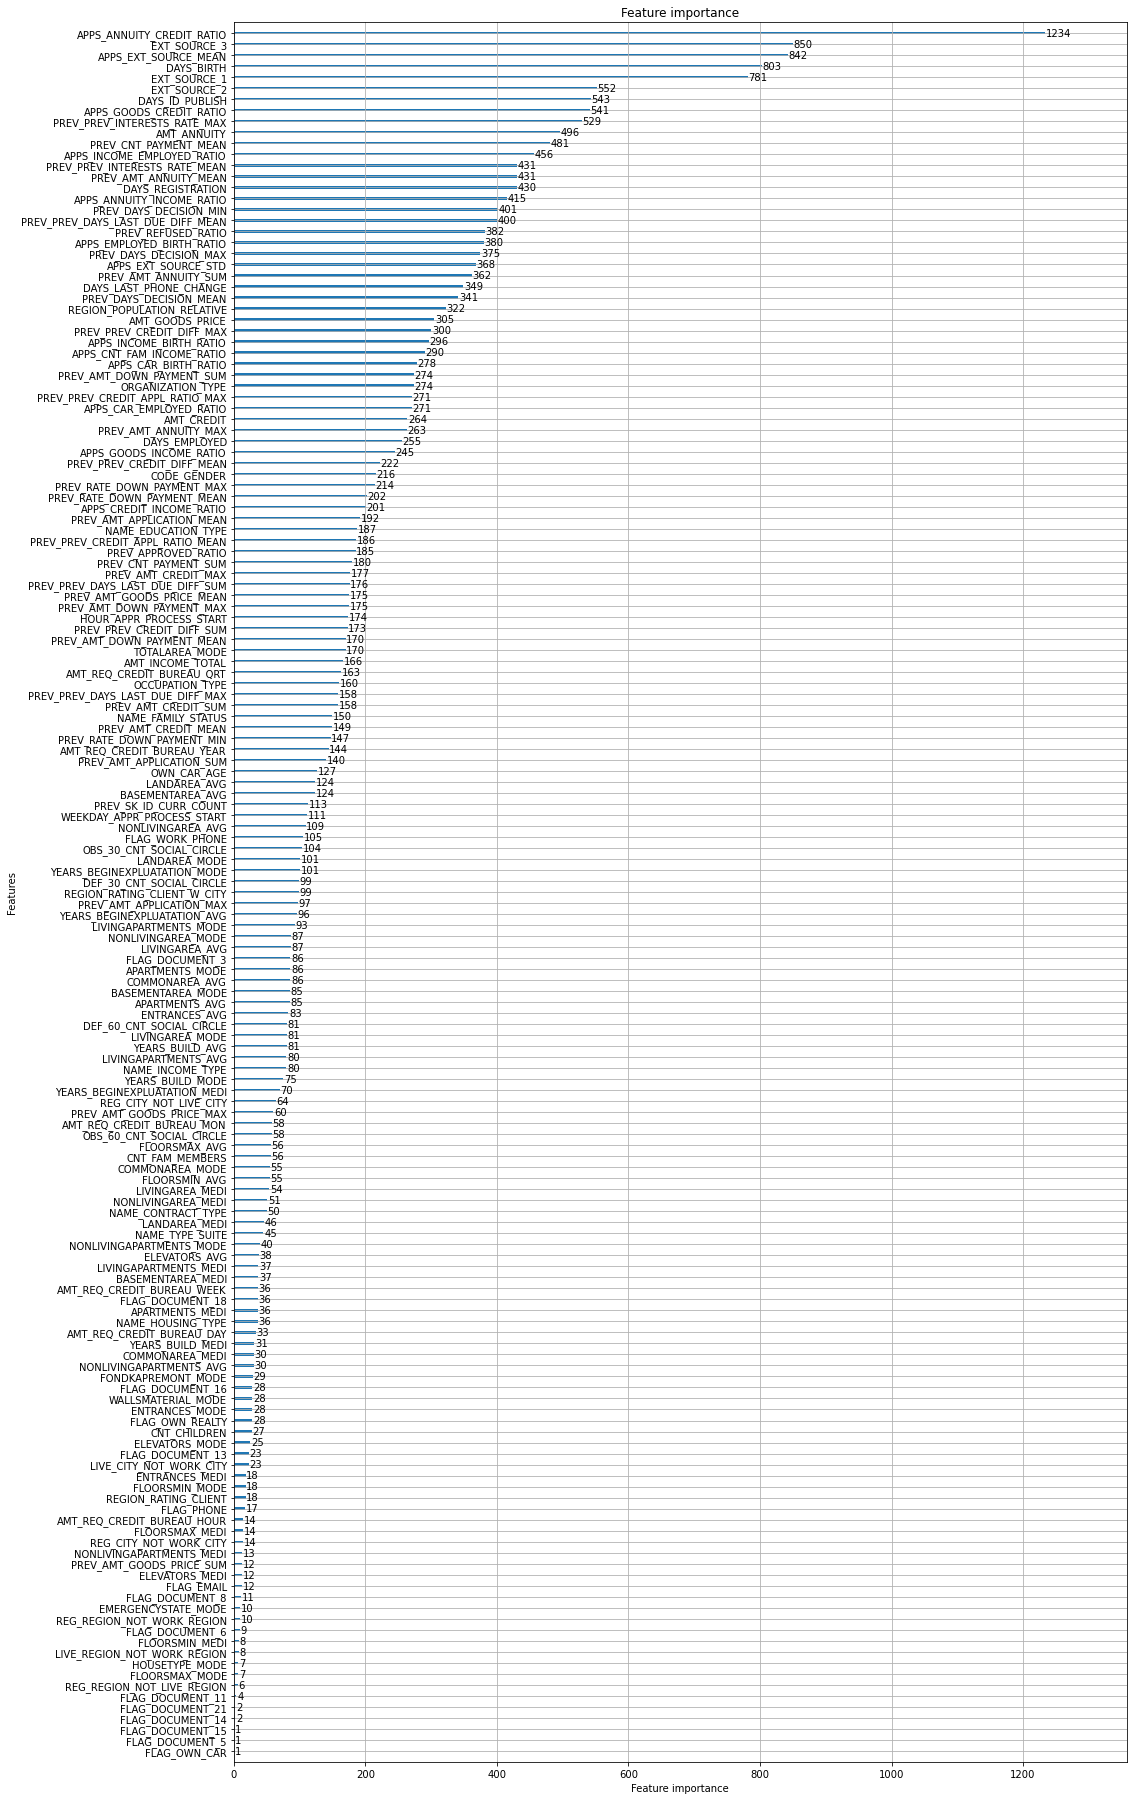

In [68]:
from lightgbm import plot_importance

plot_importance(clf, figsize=(16,32))

#### Prediction with test data using trained classifier, Kaggle submit

In [70]:
preds = clf.predict_proba(apps_all_test.drop('SK_ID_CURR', axis=1))[:,1]
apps_all_test['TARGET'] = preds

#### Make functions of the logics developed so far

In [75]:
from sklearn.model_selection import train_test_split
from lightgbm import LGBMClassifier

def get_prev_processed(prev):
    # 대출 신청 금액과 실제 대출액/대출 상품금액 차이 및 비율
    prev['PREV_CREDIT_DIFF'] = prev['AMT_APPLICATION'] - prev['AMT_CREDIT']
    prev['PREV_GOODS_DIFF'] = prev['AMT_APPLICATION'] - prev['AMT_GOODS_PRICE']
    prev['PREV_CREDIT_APPL_RATIO'] = prev['AMT_CREDIT']/prev['AMT_APPLICATION']
    # prev['PREV_ANNUITY_APPL_RATIO'] = prev['AMT_ANNUITY']/prev['AMT_APPLICATION']
    prev['PREV_GOODS_APPL_RATIO'] = prev['AMT_GOODS_PRICE']/prev['AMT_APPLICATION']
    
    prev['DAYS_FIRST_DRAWING'].replace(365243, np.nan, inplace= True)
    prev['DAYS_FIRST_DUE'].replace(365243, np.nan, inplace= True)
    prev['DAYS_LAST_DUE_1ST_VERSION'].replace(365243, np.nan, inplace= True)
    prev['DAYS_LAST_DUE'].replace(365243, np.nan, inplace= True)
    prev['DAYS_TERMINATION'].replace(365243, np.nan, inplace= True)
    # 첫번째 만기일과 마지막 만기일까지의 기간
    prev['PREV_DAYS_LAST_DUE_DIFF'] = prev['DAYS_LAST_DUE_1ST_VERSION'] - prev['DAYS_LAST_DUE']
    # 매월 납부 금액과 납부 횟수 곱해서 전체 납부 금액 구함. 
    all_pay = prev['AMT_ANNUITY'] * prev['CNT_PAYMENT']
    # 전체 납부 금액 대비 AMT_CREDIT 비율을 구하고 여기에 다시 납부횟수로 나누어서 이자율 계산. 
    prev['PREV_INTERESTS_RATE'] = (all_pay/prev['AMT_CREDIT'] - 1)/prev['CNT_PAYMENT']
        
    return prev
    

def get_prev_amt_agg(prev):
    agg_dict = {
         # 기존 주요 컬럼들을 SK_ID_CURR 레벨로 Aggregation 수행. . 
        'SK_ID_CURR':['count'],
        'AMT_CREDIT':['mean', 'max', 'sum'],
        'AMT_ANNUITY':['mean', 'max', 'sum'], 
        'AMT_APPLICATION':['mean', 'max', 'sum'],
        'AMT_DOWN_PAYMENT':['mean', 'max', 'sum'],
        'AMT_GOODS_PRICE':['mean', 'max', 'sum'],
        'RATE_DOWN_PAYMENT': ['min', 'max', 'mean'],
        'DAYS_DECISION': ['min', 'max', 'mean'],
        'CNT_PAYMENT': ['mean', 'sum'],
        # 신규 가공 컬럼들을 SK_ID_CURR 레벨로 Aggregation 수행. .
        'PREV_CREDIT_DIFF':['mean', 'max', 'sum'], 
        'PREV_CREDIT_APPL_RATIO':['mean', 'max'],
        'PREV_GOODS_DIFF':['mean', 'max', 'sum'],
        'PREV_GOODS_APPL_RATIO':['mean', 'max'],
        'PREV_DAYS_LAST_DUE_DIFF':['mean', 'max', 'sum'],
        'PREV_INTERESTS_RATE':['mean', 'max']
    }
    
    prev_group = prev.groupby('SK_ID_CURR')
    prev_amt_agg = prev_group.agg(agg_dict)

    # multi index 컬럼을 '_'로 연결하여 컬럼명 변경
    prev_amt_agg.columns = ["PREV_"+ "_".join(x).upper() for x in prev_amt_agg.columns.ravel()]
    
    # 'SK_ID_CURR'로 조인하기 위해 SK_ID_CURR을 컬럼으로 변환  
    prev_amt_agg = prev_amt_agg.reset_index()
    
    return prev_amt_agg

def get_prev_refused_appr_agg(prev):
    # 원래 groupby 컬럼 + 세부 기준 컬럼으로 groupby 수행. 세분화된 레벨로 aggregation 수행 한 뒤에 unstack()으로 컬럼레벨로 변형. 
    prev_refused_appr_group = prev[prev['NAME_CONTRACT_STATUS'].isin(['Approved', 'Refused'])].groupby([ 'SK_ID_CURR', 'NAME_CONTRACT_STATUS'])
    prev_refused_appr_agg = prev_refused_appr_group['SK_ID_CURR'].count().unstack()
    # 컬럼명 변경. 
    prev_refused_appr_agg.columns = ['PREV_APPROVED_COUNT', 'PREV_REFUSED_COUNT' ]
    # NaN값은 모두 0으로 변경. 
    prev_refused_appr_agg = prev_refused_appr_agg.fillna(0)
    
    # 'SK_ID_CURR'로 조인하기 위해 SK_ID_CURR을 컬럼으로 변환  
    prev_refused_appr_agg = prev_refused_appr_agg.reset_index()
    
    return prev_refused_appr_agg

def get_prev_agg(prev):
    prev = get_prev_processed(prev)
    prev_amt_agg = get_prev_amt_agg(prev)
    prev_refused_appr_agg = get_prev_refused_appr_agg(prev)
    
    # prev_amt_agg와 조인. 
    prev_agg = prev_amt_agg.merge(prev_refused_appr_agg, on='SK_ID_CURR', how='left')
    
    # SK_ID_CURR별 과거 대출건수 대비 APPROVED_COUNT 및 REFUSED_COUNT 비율 생성. 
    prev_agg['PREV_REFUSED_RATIO'] = prev_agg['PREV_REFUSED_COUNT']/prev_agg['PREV_SK_ID_CURR_COUNT']
    prev_agg['PREV_APPROVED_RATIO'] = prev_agg['PREV_APPROVED_COUNT']/prev_agg['PREV_SK_ID_CURR_COUNT']
    # 'PREV_REFUSED_COUNT', 'PREV_APPROVED_COUNT' 컬럼 drop 
    prev_agg = prev_agg.drop(['PREV_REFUSED_COUNT', 'PREV_APPROVED_COUNT'], axis=1)
    
    return prev_agg

def get_apps_all_with_prev_agg(apps, prev):
    apps_all =  get_apps_processed(apps)
    prev_agg = get_prev_agg(prev)
    print('prev_agg shape:', prev_agg.shape)
    print('apps_all before merge shape:', apps_all.shape)
    apps_all = apps_all.merge(prev_agg, on='SK_ID_CURR', how='left')
    print('apps_all after merge with prev_agg shape:', apps_all.shape)    
    
    return apps_all

def get_apps_all_encoded(apps_all):
    object_columns = apps_all.dtypes[apps_all.dtypes == 'object'].index.tolist()
    for column in object_columns:
        apps_all[column] = pd.factorize(apps_all[column])[0]
        
    return apps_all

def get_apps_all_train_test(apps_all):
    apps_all_train = apps_all[~apps_all['TARGET'].isnull()]
    apps_all_test = apps_all[apps_all['TARGET'].isnull()]

    apps_all_test = apps_all_test.drop('TARGET', axis=1)
    
    return apps_all_train, apps_all_test
    

def train_apps_all(apps_all_train):
    ftr_app = apps_all_train.drop(['SK_ID_CURR', 'TARGET'], axis=1)
    target_app = apps_all_train['TARGET']

    train_x, valid_x, train_y, valid_y = train_test_split(ftr_app, target_app, test_size=0.3, random_state=2020)
    print('train shape:', train_x.shape, 'valid shape:', valid_x.shape)
    clf = LGBMClassifier(
            n_jobs=-1,
            n_estimators=1000,
            learning_rate=0.02,
            num_leaves=32,
            subsample=0.8,
            max_depth=12,
            silent=-1,
            verbose=-1
                )

    clf.fit(train_x, train_y, eval_set=[(train_x, train_y), (valid_x, valid_y)], eval_metric= 'auc', verbose= 100, 
                early_stopping_rounds= 100)
    
    return clf

In [77]:
# application data set and previous data set merge after feature engineering to generate apps_all
apps_all = get_apps_all_with_prev_agg(apps, prev)
# Label encoding
apps_all = get_apps_all_encoded(apps_all)
# train_test split
apps_all_train_apps_all_test = get_apps_all_train_test(apps_all)
# training
clf = train_apps_all(apps_all_train)

prev_agg shape: (338857, 42)
apps_all before merge shape: (356255, 135)
apps_all after merge with prev_agg shape: (356255, 176)
train shape: (215257, 174) valid shape: (92254, 174)
Training until validation scores don't improve for 100 rounds
[100]	training's auc: 0.76611	training's binary_logloss: 0.245964	valid_1's auc: 0.753702	valid_1's binary_logloss: 0.248684
[200]	training's auc: 0.789025	training's binary_logloss: 0.237779	valid_1's auc: 0.766045	valid_1's binary_logloss: 0.244034
[300]	training's auc: 0.804705	training's binary_logloss: 0.232402	valid_1's auc: 0.770975	valid_1's binary_logloss: 0.242307
[400]	training's auc: 0.81739	training's binary_logloss: 0.228102	valid_1's auc: 0.773261	valid_1's binary_logloss: 0.241518
[500]	training's auc: 0.828598	training's binary_logloss: 0.224327	valid_1's auc: 0.773914	valid_1's binary_logloss: 0.241254
[600]	training's auc: 0.839337	training's binary_logloss: 0.220751	valid_1's auc: 0.77426	valid_1's binary_logloss: 0.241113
[700

In [79]:
preds = clf.predict_proba(apps_all_test.drop(['SK_ID_CURR', 'TARGET'], axis=1))[:,1]
apps_all_test['TARGET'] = preds
apps_all_test[['SK_ID_CURR', 'TARGET']].to_csv('prev_baseline_01.csv', index=False)